# Pizza Place Sales Analysis

## Project Overview
This project analyzes one year of pizza sales data to uncover revenue trends, customer ordering patterns, and product performance.

## Objectives

-Calculate Total Revenue
-Identify best and worst selling Pizzas
-Analyze sales trends by hour, day, and month
-Provide business recommendations

In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

orders = pd.read_csv(r"C:\Users\dell 5420\Downloads\TASK 3_DATA S\Pizza+Place+Sales\pizza_sales\orders.csv", encoding="latin1")
order_details = pd.read_csv(r"C:\Users\dell 5420\Downloads\TASK 3_DATA S\Pizza+Place+Sales\pizza_sales\order_details.csv", encoding="latin1")
pizzas = pd.read_csv(r"C:\Users\dell 5420\Downloads\TASK 3_DATA S\Pizza+Place+Sales\pizza_sales\pizzas.csv", encoding="latin1")
pizza_types = pd.read_csv(r"C:\Users\dell 5420\Downloads\TASK 3_DATA S\Pizza+Place+Sales\pizza_sales\pizza_types.csv", encoding="latin1")

In [360]:
orders.shape
order_details.shape
pizzas.shape
pizza_types.shape

(32, 4)

In [361]:
orders.shape

(21350, 3)

In [362]:
order_details.shape

(48620, 4)

In [363]:
print(orders.shape)
print(order_details.shape)
print(pizzas.shape)
print(pizza_types.shape)

(21350, 3)
(48620, 4)
(96, 4)
(32, 4)


# Inspecting Orders Dataset

In [364]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [365]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [366]:
orders["date"] = pd.to_datetime(orders["date"])

In [367]:
orders.isnull().sum()

order_id    0
date        0
time        0
dtype: int64

In [368]:
orders["hour"] = pd.to_datetime(orders["time"], format="%H:%M:%S").dt.hour

In [369]:
orders.duplicated().sum()

np.int64(0)

In [370]:
orders.describe()

,order_id,date,hour
count,21350.000000,21350,21350.000000
mean,10675.500000,2015-06-28 23:41:47.353630208,16.085527
min,1.000000,2015-01-01 00:00:00,9.000000
25%,5338.250000,2015-03-31 00:00:00,13.000000
50%,10675.500000,2015-06-28 00:00:00,16.000000
75%,16012.750000,2015-09-27 00:00:00,19.000000
max,21350.000000,2015-12-31 00:00:00,23.000000
std,6163.358459,NaN,3.152723


# Converting date and time into one column

In [371]:
orders["datetime"] = pd.to_datetime(orders["date"].astype(str) + " " + orders["time"])

## The time column was initially stored as object data type.
It was converted to datetime format using pd.to_datetime() to enable time-based analysis e.g peak sales hours.
An additional hour column was extracted from the time column to support hourly sales analysis.

In [372]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  21350 non-null  int64         
 1   date      21350 non-null  datetime64[ns]
 2   time      21350 non-null  object        
 3   hour      21350 non-null  int32         
 4   datetime  21350 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(1)
memory usage: 750.7+ KB


In [373]:
order_details.head()  #Checking the top 5 columns

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [374]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [375]:
order_details.isnull().sum()  #Checking for null values

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [376]:
order_details.duplicated().sum()

np.int64(0)

In [377]:
order_details.describe()

,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


In [378]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [379]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [380]:
pizzas.isnull().sum()  #Checking for null values

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

In [381]:
pizzas.duplicated().sum()

np.int64(0)

In [382]:
pizzas.describe()

,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


In [383]:
pizza_types.head()  #Top 5

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [384]:
pizza_types.shape

(32, 4)

In [385]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [386]:
orders.columns

Index(['order_id', 'date', 'time', 'hour', 'datetime'], dtype='object')

In [387]:
merged_df = orders.copy()

In [388]:
type(merged_df)

pandas.core.frame.DataFrame

## Merging Orders with Order Details

In [389]:
merged_df = merged_df.merge(order_details, on="order_id", how="inner")

In [390]:
merged_df.columns

Index(['order_id', 'date', 'time', 'hour', 'datetime', 'order_details_id',
       'pizza_id', 'quantity'],
      dtype='object')

## Merging with Pizzas

In [391]:
merged_df = merged_df.merge(pizzas, on="pizza_id", how="inner")

In [392]:
merged_df.columns

Index(['order_id', 'date', 'time', 'hour', 'datetime', 'order_details_id',
       'pizza_id', 'quantity', 'pizza_type_id', 'size', 'price'],
      dtype='object')

## Merging with Pizza Types

In [393]:
merged_df = merged_df.merge(pizza_types, on="pizza_type_id", how="inner")

In [394]:
merged_df.columns

Index(['order_id', 'date', 'time', 'hour', 'datetime', 'order_details_id',
       'pizza_id', 'quantity', 'pizza_type_id', 'size', 'price', 'name',
       'category', 'ingredients'],
      dtype='object')

In [395]:
merged_df["revenue"] = merged_df["quantity"] * merged_df["price"]

In [396]:
merged_df.columns

Index(['order_id', 'date', 'time', 'hour', 'datetime', 'order_details_id',
       'pizza_id', 'quantity', 'pizza_type_id', 'size', 'price', 'name',
       'category', 'ingredients', 'revenue'],
      dtype='object')

In [397]:
## Verifying the Merging steps

In [398]:
merged_df.columns
merged_df.head()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  object        
 3   hour              48620 non-null  int32         
 4   datetime          48620 non-null  datetime64[ns]
 5   order_details_id  48620 non-null  int64         
 6   pizza_id          48620 non-null  object        
 7   quantity          48620 non-null  int64         
 8   pizza_type_id     48620 non-null  object        
 9   size              48620 non-null  object        
 10  price             48620 non-null  float64       
 11  name              48620 non-null  object        
 12  category          48620 non-null  object        
 13  ingredients       48620 non-null  object        
 14  revenue           4862

In [399]:
merged_df.isnull().sum() #Missing values check

order_id            0
date                0
time                0
hour                0
datetime            0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
revenue             0
dtype: int64

## Q.1 Total revenue

In [400]:
total_revenue = merged_df["revenue"].sum()
total_revenue

np.float64(817860.0499999999)

In [401]:
round(total_revenue, 2)

np.float64(817860.05)

In [402]:
# Insight: The Total Reveue generated from Pizza sales during the period is $817, 860.05.
# This represents the total income earned from all pizza orders. This is key beacuse it shows the general financial performance of the pizza business and its success over the period

In [403]:
merged_df["price"].describe()

count    48620.000000
mean        16.494132
std          3.621789
min          9.750000
25%         12.750000
50%         16.500000
75%         20.250000
max         35.950000
Name: price, dtype: float64

## Q2. Total quantity Sold

In [404]:
total_quantity = merged_df["quantity"].sum()
print(total_quantity)

49574


In [405]:
# A total of 49,574 pizzas were sold during the period.
# This gives the overall sales volume and customer's demand for the store's products.

## Q3. Total Number of Orders

In [406]:
total_no_of_orders = merged_df["order_id"].nunique()
total_no_of_orders

21350

In [407]:
# There were 21,350 unique orders.

## Q4. Average Pizzas per order

In [408]:
merged_df["quantity"].sum() / total_no_of_orders

np.float64(2.321967213114754)

In [409]:
#Approximately 2.3 pizzas per order

## Q5. How many pizza types do they sell?

In [410]:
pizza_types_number = merged_df["pizza_type_id"].nunique()
pizza_types_number

32

In [411]:
# The number of pizza types sold is 32

## Q6. Peak Hour Analysis

In [412]:
merged_df["hour"].head()

0    11
1    11
2    11
3    11
4    11
Name: hour, dtype: int32

In [413]:
merged_df["time"].head(10)

0    11:38:36
1    11:57:40
2    11:57:40
3    11:57:40
4    11:57:40
5    11:57:40
6    12:12:28
7    12:12:28
8    12:16:31
9    12:21:30
Name: time, dtype: object

In [414]:
merged_df["hour"] = pd.to_datetime(merged_df["time"]).dt.hour

C:\Users\dell 5420\AppData\Local\Temp\ipykernel_3668\753758167.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df["hour"] = pd.to_datetime(merged_df["time"]).dt.hour


In [415]:
merged_df[["time", "hour"]].head(10)

,time,hour
0,11:38:36,11
1,11:57:40,11
2,11:57:40,11
3,11:57:40,11
4,11:57:40,11
5,11:57:40,11
6,12:12:28,12
7,12:12:28,12
8,12:16:31,12
9,12:21:30,12


In [416]:
hourly_sales = merged_df.groupby("hour")["revenue"].sum().sort_values(ascending=False)
hourly_sales

hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
16     70055.40
14     59201.40
20     58215.40
15     52992.30
11     44935.80
21     42029.80
22     22815.15
23      1121.35
10       303.65
9         83.00
Name: revenue, dtype: float64

In [417]:
# Peak hour of sales == 12pm
#This shows the busiest time of the day, generating $111,877.90 in revenue.
# It corresponds to Lunch time and gives the insight and possibility of adding more staff members to optimize profit.

## Q7. Total sales made on each day of the week

In [418]:
merged_df["day_of_week"] = merged_df["datetime"].dt.day_name()
merged_df[["datetime", "day_of_week"]].head()

,datetime,day_of_week
0,2015-01-01 11:38:36,Thursday
1,2015-01-01 11:57:40,Thursday
2,2015-01-01 11:57:40,Thursday
3,2015-01-01 11:57:40,Thursday
4,2015-01-01 11:57:40,Thursday


In [419]:
daily_sales = merged_df.groupby("day_of_week")["revenue"].sum().sort_values(ascending=False)
daily_sales

day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64

In [420]:
# This shows that Friday is the busiest, generating the highest total sales.

## Q8. Top 5 best selling pizzas

In [421]:
pizza_sales =merged_df.groupby("name")["quantity"].sum().sort_values(ascending=False)
pizza_sales.head(5)

name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

## Q9. Sales made in each month with the possibility of noticeable changes

In [422]:
merged_df["datetime"].head()

0   2015-01-01 11:38:36
1   2015-01-01 11:57:40
2   2015-01-01 11:57:40
3   2015-01-01 11:57:40
4   2015-01-01 11:57:40
Name: datetime, dtype: datetime64[ns]

In [423]:
merged_df["month"] = merged_df["datetime"].dt.month
merged_df["month_name"] = merged_df["datetime"].dt.month_name()

In [424]:
# Total revenues per month

In [425]:
monthly_sales = merged_df.groupby("month_name")["revenue"].sum().reindex(["january", "Februray", "March", "April", "May", "June",
                                                                         "July", "Aug", "Sept.", "Oct.", "Nov.", "Dec."])
                                                                         

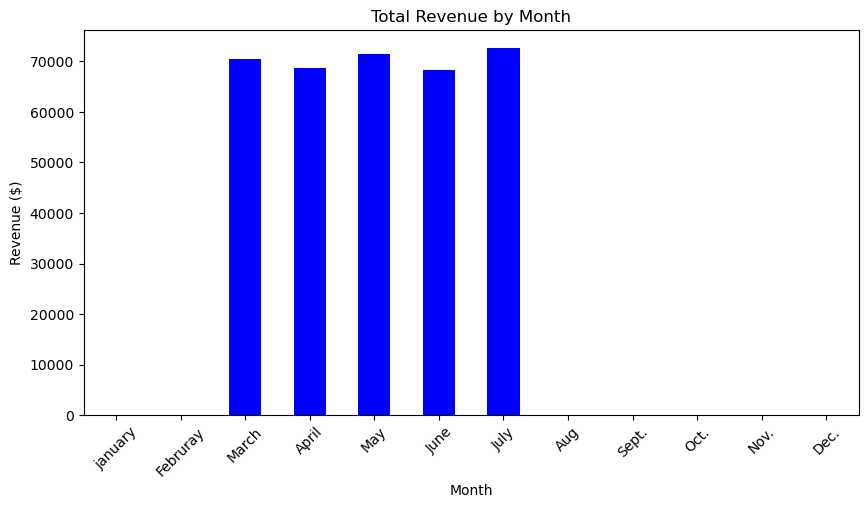

In [426]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
monthly_sales.plot(kind="bar", color="blue")
plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()

In [427]:
# The analysis shows highest revenue was experienced in July
#From March to July, the monthly revenue shows a little alternating pattern of increase and decrease rather than a steadily rise or fall
# While there are minor fluctuations, the overall sales is relatively stable...indicating consistent customers' demands.

## Q10. Pizza types that are not doing well

In [428]:
# Bottom 5 pizzas by the quantity sold

In [429]:
low_selling_pizzas = merged_df.groupby("name")["quantity"].sum().sort_values().head(5)
low_selling_pizzas

name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64

In [430]:
# These pizzas contribute the least to the total sales.
#Suggestion: Improvement on the ingredients used and the promotion to gain attention